# **Project 33: Car Acceptability Predictor**

***Seaborn*** : *A Python data visualization library based on Matplotlib that provides a high-level interface for drawing attractive and informative statistical graphics.*

***Matplotlib*** : *A comprehensive library for creating static, animated, and interactive visualizations in Python.*

***Pandas*** : *A powerful data manipulation and analysis library for Python, offering data structures like DataFrame for handling structured data.*

***NumPy*** : *A fundamental package for scientific computing in Python, providing support for arrays, mathematical functions, and linear algebra operations.*

***Warnings*** : *A built-in Python module for issuing warning messages and managing warning filters.*

# **Data Loading**

**We import these libraries for Data Loading, Data Cleaning, Data Visualization and EDA(Explorotory Data Analysis).**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

**warnings.simplefilter("ignore") is a command used to suppress all warning messages in Python.**

In [2]:
warnings.simplefilter("ignore")

**This code reads a CSV file named "car.data" into a DataFrame using Pandas and displays the first five rows.**

In [3]:
df = pd.read_csv("/content/car.data")
df.head(5)

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


**df.isnull().sum() provides the number of missing values in each column of the DataFrame.**

In [4]:
df.isnull().sum()

,0
vhigh,0
vhigh.1,0
2,0
2.1,0
small,0
low,0
unacc,0


**df.info() provides a concise summary of the DataFrame, which includes the index dtype and column dtypes, non-null values, and memory usage.**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


**This code reads the "car.data" CSV file into a DataFrame with specified column names (buying, maint, doors, persons, lug_boot, safety, class).**

In [6]:
columns = ["buying", "maint", "doors",  "persons", "lug_boot", "safety", "class"]

df = pd.read_csv("/content/car.data", names=columns)

**This will display the first five rows of the DataFrame df, showing the data under the specified column names.**

In [7]:
df.head(5)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


# **Data Visualization**

**This code creates a pie chart showing the distribution of values in the "class" column of the DataFrame df. The chart is configured with custom colors and percentages displayed on each slice.**

**This chart illustrates the distribution of unique categories present in the "class" column, which is the target variable.**

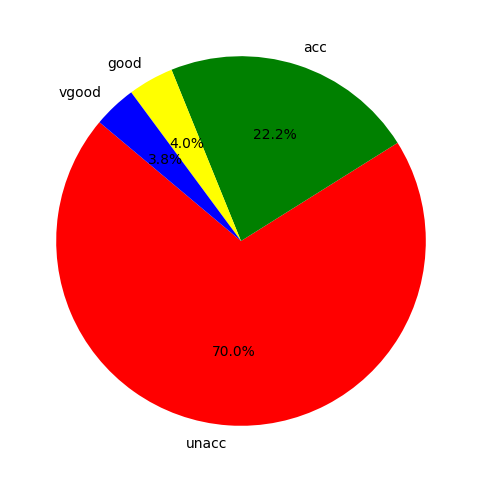

In [8]:
class_counts = df["class"].value_counts()

plt.figure(figsize=(8 ,6))
plt.pie(class_counts, labels = class_counts.index, autopct = "%1.1f%%", colors= ["red", "green", "yellow", "blue"], startangle=140)
plt.show()

**This code generates a bar plot showing the frequency of each unique value in the "safety" column of the DataFrame df, using the "Set1" color palette.**

**This graph displays the count of safety measures categorized as low, medium, and high.**

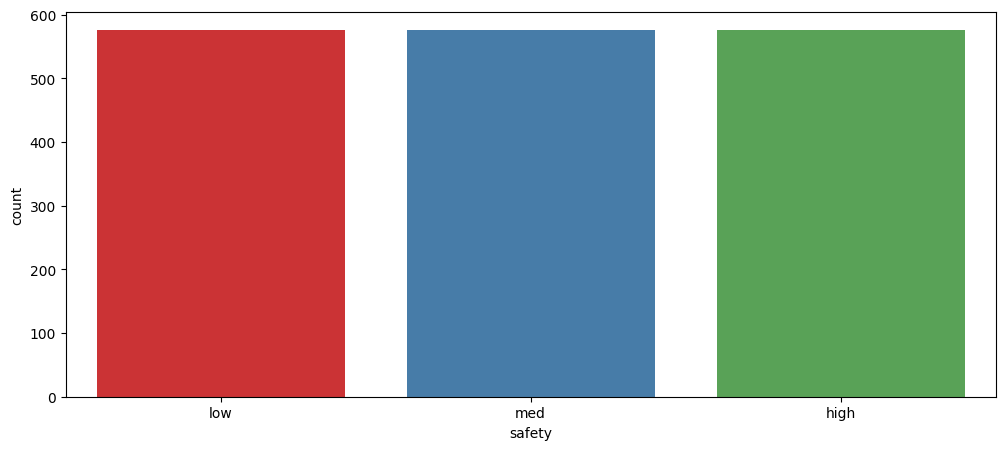

In [9]:
plt.figure(figsize=(12, 5))
sns.countplot(x="safety", data=df, palette="Set1")
plt.show()

**This code returns a list of all the column names in the DataFrame df.**

In [10]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

# **Data Cleaning**

**This code returns the unique values in the "buying" column of the DataFrame df.**

In [11]:
df["buying"].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

**This code converts the categorical "buying" column into one-hot encoded columns and displays the first 5 rows of the updated DataFrame.**

In [12]:
df = pd.get_dummies(df, columns=["buying"])
df.head(5)

,maint,doors,persons,lug_boot,safety,class,buying_high,buying_low,buying_med,buying_vhigh
0,vhigh,2,2,small,low,unacc,False,False,False,True
1,vhigh,2,2,small,med,unacc,False,False,False,True
2,vhigh,2,2,small,high,unacc,False,False,False,True
3,vhigh,2,2,med,low,unacc,False,False,False,True
4,vhigh,2,2,med,med,unacc,False,False,False,True


**This code converts the one-hot encoded columns for "buying" into integer data type and displays the first 5 rows of the updated DataFrame.**

In [13]:
buying_columns = ["buying_high", "buying_low", "buying_med", "buying_vhigh"]

df[buying_columns] = df[buying_columns].astype(int)

df.head(5)

,maint,doors,persons,lug_boot,safety,class,buying_high,buying_low,buying_med,buying_vhigh
0,vhigh,2,2,small,low,unacc,0,0,0,1
1,vhigh,2,2,small,med,unacc,0,0,0,1
2,vhigh,2,2,small,high,unacc,0,0,0,1
3,vhigh,2,2,med,low,unacc,0,0,0,1
4,vhigh,2,2,med,med,unacc,0,0,0,1


**This code returns the unique values in the "maint" column of the DataFrame df.**

In [14]:
df["maint"].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

**This code converts the categorical "maint" column into one-hot encoded columns and displays the first 5 rows of the updated DataFrame.**

In [15]:
df = pd.get_dummies(df, columns = ["maint"])
df.head(5)

,doors,persons,lug_boot,safety,class,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh
0,2,2,small,low,unacc,0,0,0,1,False,False,False,True
1,2,2,small,med,unacc,0,0,0,1,False,False,False,True
2,2,2,small,high,unacc,0,0,0,1,False,False,False,True
3,2,2,med,low,unacc,0,0,0,1,False,False,False,True
4,2,2,med,med,unacc,0,0,0,1,False,False,False,True


**This code converts the one-hot encoded columns for "maint" into integer data type and displays the first 5 rows of the updated DataFrame.**

In [16]:
maint_columns = ["maint_high", "maint_low", "maint_med", "maint_vhigh"]

df[maint_columns] = df[maint_columns].astype(int)

df.head(5)

,doors,persons,lug_boot,safety,class,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh
0,2,2,small,low,unacc,0,0,0,1,0,0,0,1
1,2,2,small,med,unacc,0,0,0,1,0,0,0,1
2,2,2,small,high,unacc,0,0,0,1,0,0,0,1
3,2,2,med,low,unacc,0,0,0,1,0,0,0,1
4,2,2,med,med,unacc,0,0,0,1,0,0,0,1


**This code returns the unique values in the "lug_boot" column of the DataFrame df.**

In [17]:
df["lug_boot"].unique()

array(['small', 'med', 'big'], dtype=object)

**This code converts the categorical "lug_boot" column into one-hot encoded columns and displays the first 5 rows of the updated DataFrame.**

In [18]:
df = pd.get_dummies(df, columns = ["lug_boot"])
df.head(5)

,doors,persons,safety,class,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,lug_boot_big,lug_boot_med,lug_boot_small
0,2,2,low,unacc,0,0,0,1,0,0,0,1,False,False,True
1,2,2,med,unacc,0,0,0,1,0,0,0,1,False,False,True
2,2,2,high,unacc,0,0,0,1,0,0,0,1,False,False,True
3,2,2,low,unacc,0,0,0,1,0,0,0,1,False,True,False
4,2,2,med,unacc,0,0,0,1,0,0,0,1,False,True,False


**This code converts the one-hot encoded columns for "lub_boot" into integer data type and displays the first 5 rows of the updated DataFrame.**

In [19]:
lug_boot_columns = ["lug_boot_big", "lug_boot_med", "lug_boot_small"]

df[lug_boot_columns] = df[lug_boot_columns].astype(int)

df.head(5)

,doors,persons,safety,class,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,lug_boot_big,lug_boot_med,lug_boot_small
0,2,2,low,unacc,0,0,0,1,0,0,0,1,0,0,1
1,2,2,med,unacc,0,0,0,1,0,0,0,1,0,0,1
2,2,2,high,unacc,0,0,0,1,0,0,0,1,0,0,1
3,2,2,low,unacc,0,0,0,1,0,0,0,1,0,1,0
4,2,2,med,unacc,0,0,0,1,0,0,0,1,0,1,0


**This code returns the unique values in the "safety" column of the DataFrame df.**

In [20]:
df["safety"].unique()

array(['low', 'med', 'high'], dtype=object)

**This code converts the categorical "safety" column into one-hot encoded columns and displays the first 5 rows of the updated DataFrame.**

In [21]:
df = pd.get_dummies(df, columns=["safety"])
df.head(5)

,doors,persons,class,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,2,2,unacc,0,0,0,1,0,0,0,1,0,0,1,False,True,False
1,2,2,unacc,0,0,0,1,0,0,0,1,0,0,1,False,False,True
2,2,2,unacc,0,0,0,1,0,0,0,1,0,0,1,True,False,False
3,2,2,unacc,0,0,0,1,0,0,0,1,0,1,0,False,True,False
4,2,2,unacc,0,0,0,1,0,0,0,1,0,1,0,False,False,True


**This code converts the one-hot encoded columns for "safety" into integer data type and displays the first 5 rows of the updated DataFrame.**

In [22]:
safety_columns = ["safety_low", "safety_med", "safety_high"]

df[safety_columns] = df[safety_columns].astype(int)

df.head(5)

,doors,persons,class,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,2,2,unacc,0,0,0,1,0,0,0,1,0,0,1,0,1,0
1,2,2,unacc,0,0,0,1,0,0,0,1,0,0,1,0,0,1
2,2,2,unacc,0,0,0,1,0,0,0,1,0,0,1,1,0,0
3,2,2,unacc,0,0,0,1,0,0,0,1,0,1,0,0,1,0
4,2,2,unacc,0,0,0,1,0,0,0,1,0,1,0,0,0,1


**This code returns the unique values in the "doors" column of the DataFrame df.**

In [23]:
df["doors"].unique()

array(['2', '3', '4', '5more'], dtype=object)

**This code returns the unique values in the "persons" column of the DataFrame df.**

In [24]:
df["persons"].unique()

array(['2', '4', 'more'], dtype=object)

**The code replaces the string "5more" with "5" in the "doors" column and then displays the unique values in the "doors" column.**

In [25]:
df["doors"] = df["doors"].replace("5more", "5")
df["doors"].unique()

array(['2', '3', '4', '5'], dtype=object)

**The code replaces the string "more" with "5" in the "persons" column and then displays the unique values in the "persons" column.**

In [26]:
df["persons"] = df["persons"].replace("more", "5")
df["persons"].unique()

array(['2', '4', '5'], dtype=object)

**To display the first 5 rows of the DataFrame.**

In [27]:
df.head(5)

,doors,persons,class,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,2,2,unacc,0,0,0,1,0,0,0,1,0,0,1,0,1,0
1,2,2,unacc,0,0,0,1,0,0,0,1,0,0,1,0,0,1
2,2,2,unacc,0,0,0,1,0,0,0,1,0,0,1,1,0,0
3,2,2,unacc,0,0,0,1,0,0,0,1,0,1,0,0,1,0
4,2,2,unacc,0,0,0,1,0,0,0,1,0,1,0,0,0,1


**This code returns the unique values in the "class" column of the DataFrame df.**

In [28]:
df["class"].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

**The provided code maps categorical values in the "class" column to numeric values and displays the first 5 rows of the updated DataFrame.**

In [29]:
mapping_class = {"unacc" : 0, "acc" : 1, "vgood" : 2, "good" : 3}

df["class"] = df["class"].map(mapping_class)

df.head(5)

,doors,persons,class,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,2,2,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0
1,2,2,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1
2,2,2,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0
3,2,2,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0
4,2,2,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1


**The code generates a heatmap of the correlation matrix for the DataFrame, with annotations and a color gradient from cool to warm to show the strength of relationships between features.**

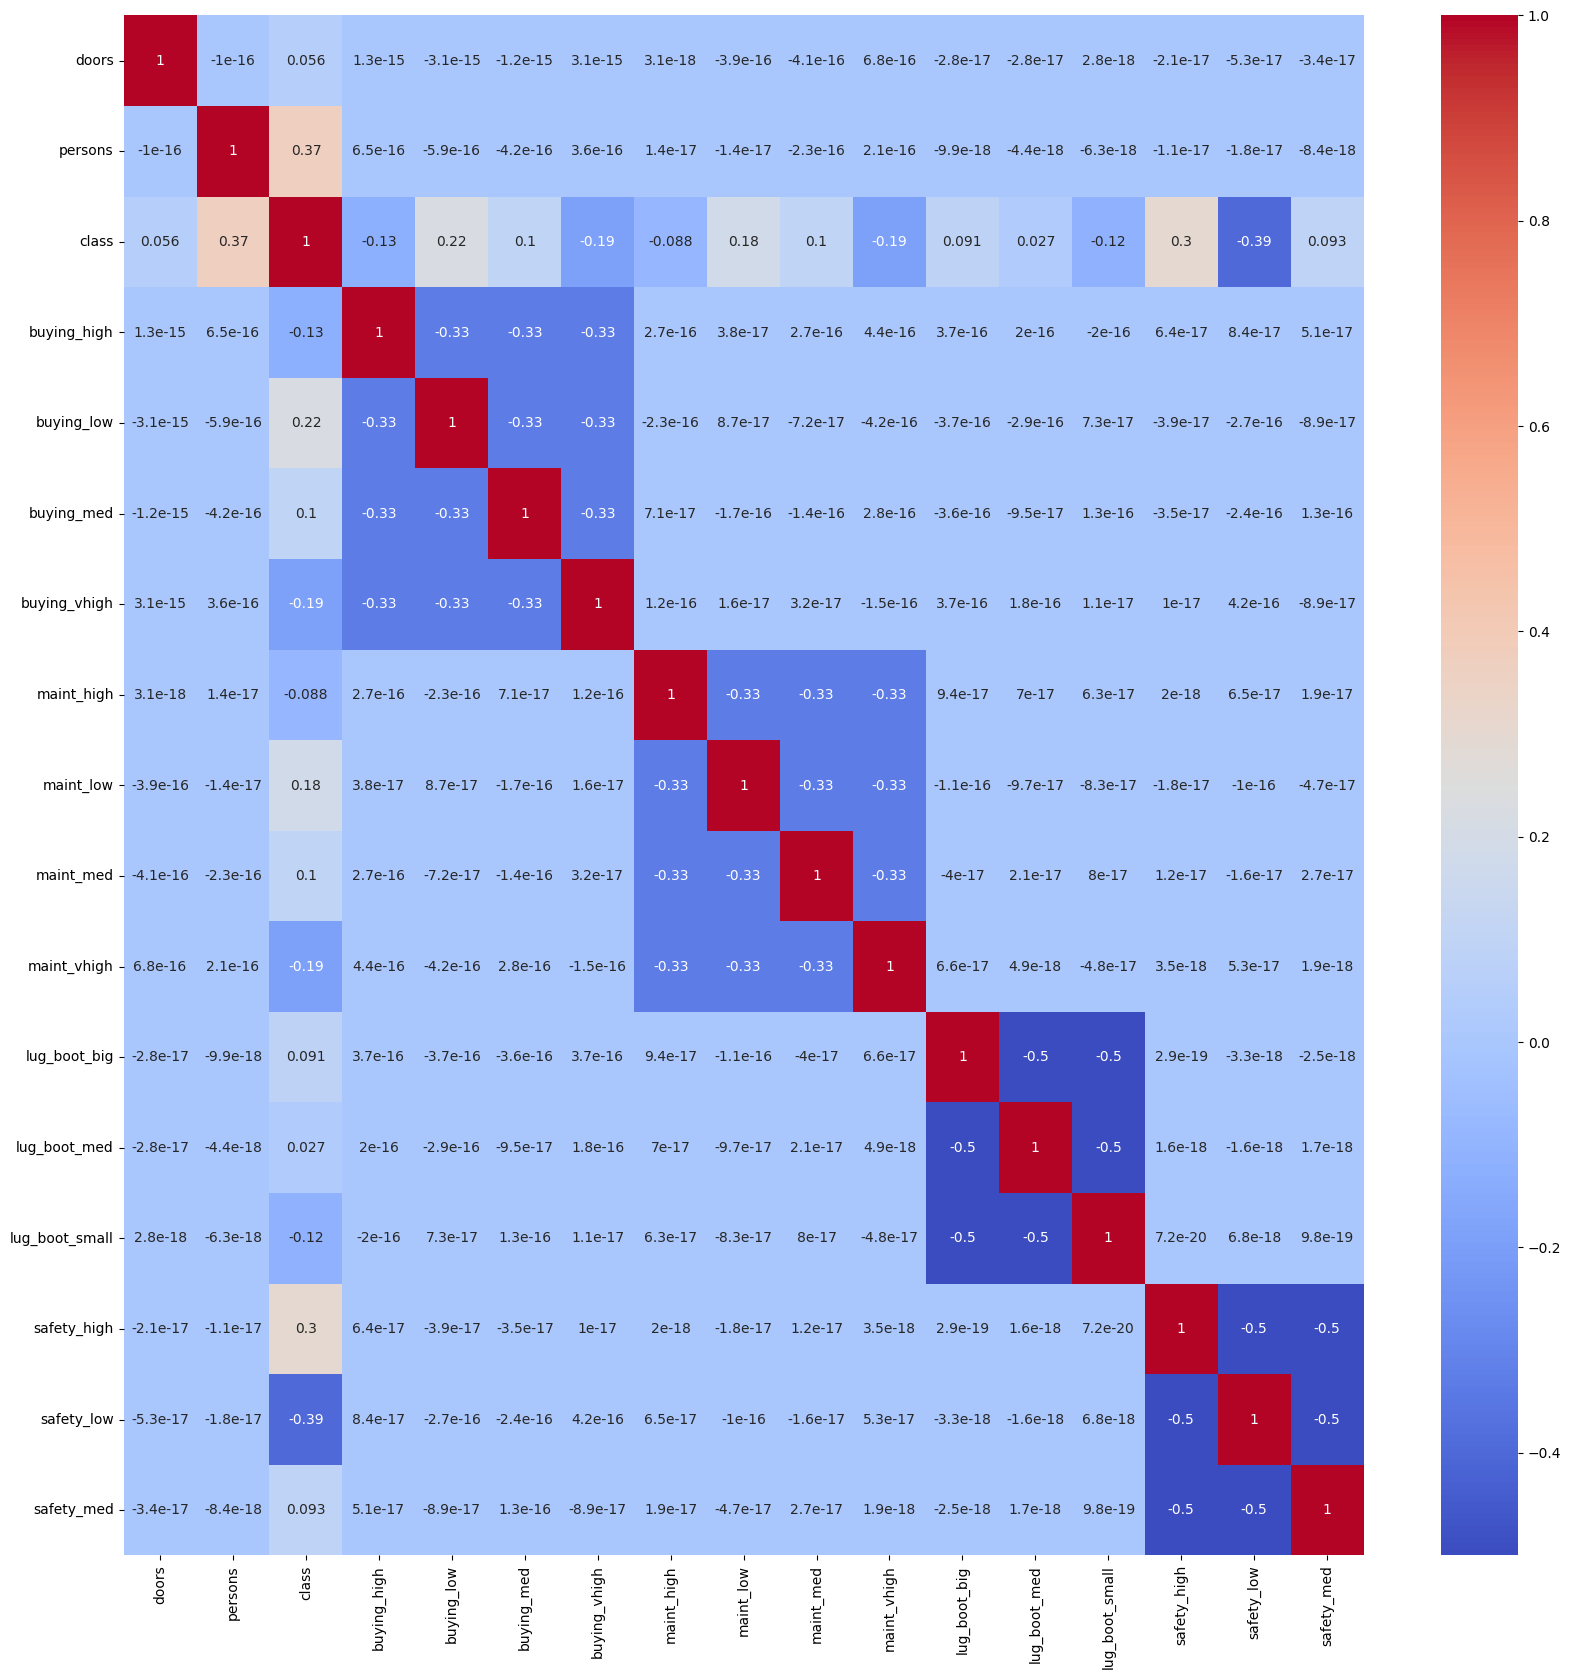

In [30]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

**To view the columns of your DataFrame.**

In [31]:
df.columns

Index(['doors', 'persons', 'class', 'buying_high', 'buying_low', 'buying_med',
       'buying_vhigh', 'maint_high', 'maint_low', 'maint_med', 'maint_vhigh',
       'lug_boot_big', 'lug_boot_med', 'lug_boot_small', 'safety_high',
       'safety_low', 'safety_med'],
      dtype='object')

# **Model Building**

**This code snippet separates the DataFrame df into feature variables (X) and target variable (y).**

**X: Contains the columns used as input features for the model.**

**y: Contains the target variable (the class labels) for the model.**

In [32]:
X = df[['doors', 'persons', 'buying_high', 'buying_low', 'buying_med',
       'buying_vhigh', 'maint_high', 'maint_low', 'maint_med', 'maint_vhigh',
       'lug_boot_big', 'lug_boot_med', 'lug_boot_small', 'safety_high',
       'safety_low', 'safety_med']]

y = df[["class"]]

**Scaler_X: Applies Min-Max scaling to the feature variables X, transforming them into a [0, 1] range.**

**Scaler_y: Applies Min-Max scaling to the target variable y, also transforming it into a [0, 1] range.**

In [33]:
from sklearn.preprocessing import MinMaxScaler

Scaler_X = MinMaxScaler().set_output(transform = "pandas")

X = Scaler_X.fit_transform(X)

Scaler_y = MinMaxScaler().set_output(transform = "pandas")

y = Scaler_y.fit_transform(y)

**This code imports the train_test_split function to split the dataset into training and testing sets, and mean_squared_error to evaluate the performance of regression models.**

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

**Splits the dataset into training and testing sets, with 80% for training and 20% for testing.**

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80)

**1: Model Initialization: Initializes a linear regression model with intercept fitting and parallel processing enabled.**

**2: Model Training: Fits the model to the training data (X_train and y_train).**

**3: Prediction: Uses the trained model to predict outcomes on the test set (X_test).**

**4: Error Calculation: Computes the mean squared error between the predicted values and the actual test set values, then prints the result.**

In [36]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression(fit_intercept=True, n_jobs= -1)

LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)

print("Linear Regression Mean Squared Error", MSE)

Linear Regression Mean Squared Error 0.030655408161132696


**1: Model Initialization: Initializes a Random Forest regressor with specified minimum samples for splitting and a maximum number of samples.**

**2: Model Training: Fits the Random Forest model to the training data (X_train and y_train).**

**3: Prediction: Uses the trained model to predict outcomes on the test set (X_test).**

**4: Error Calculation: Computes the mean squared error between the predicted values and the actual test set values, then prints the result.1:**

In [37]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(min_samples_split=10, max_samples=100)

RFR.fit(X_train, y_train)

y_pred = RFR.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)

print("Random Forest Mean Squared Error", MSE)

Random Forest Mean Squared Error 0.013765189723998088


**1: Model Initialization: Initializes a Decision Tree regressor with a specified maximum depth and minimum samples per leaf.**

**2: Model Training: Fits the Decision Tree model to the training data (X_train and y_train).**

**3: Prediction: Uses the trained model to predict outcomes on the test set (X_test).**

**4: Error Calculation: Computes the mean squared error between the predicted values and the actual test set values, then prints the result.**

In [38]:
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor(max_depth=100, min_samples_leaf=20)

DTR.fit(X_train, y_train)

y_pred = DTR.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)

print("Decision Tree Mean Squared Error", MSE)

Decision Tree Mean Squared Error 0.012096957789274318


**1: Model Initialization: Initializes a Lasso regression model with a specified regularization strength (alpha).**

**2: Model Training: Fits the Lasso model to the training data (X_train and y_train).**

**3: Prediction: Uses the trained model to predict outcomes on the test set (X_test).**

**4: Error Calculation: Computes the mean squared error between the predicted values and the actual test set values, then prints the result.**

In [39]:
from sklearn.linear_model import Lasso

Ls = Lasso(alpha=1.0)

Ls.fit(X_train, y_train)

y_pred = Ls.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)

print("Lasso Mean Squared Error", MSE)

Lasso Mean Squared Error 0.054017043766144086


# **Conclusion:**

- **Linear Regression Mean Squared Error 0.0306**
- **Random Forest Mean Squared Error 0.0137**
- **Decision Tree Mean Squared Error 0.0120**
- **Lasso Mean Squared Error 0.0540**

**The Decision Tree Regressor has the lowest Mean Squared Error (0.0120) among the models tested, outperforming Linear Regression, Random Forest, and Lasso. Therefore, the Decision Tree Regressor is selected for further model predictions due to its superior accuracy in error reduction.**

# **Save Model**

In [41]:
import pickle

with open("Finalized-Model.pickle", "wb") as file:
    pickle.dump(DTR, file)

with open("Scaler_X.pickle", "wb") as file:
    pickle.dump(Scaler_X, file)